### **I. Import the Libraries and Load Stock Data**

In [17]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's grab data for Apple `AAPL` for the last year

In [3]:
data = yf.download("AAPL", start="2024-01-01", end="2025-01-01", auto_adjust=False)

print(data.head())

[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2024-01-02  184.290421  185.639999  188.440002  183.889999  187.149994   
2024-01-03  182.910507  184.250000  185.880005  183.429993  184.220001   
2024-01-04  180.587540  181.910004  183.089996  180.880005  182.149994   
2024-01-05  179.862823  181.179993  182.759995  180.169998  181.990005   
2024-01-08  184.210999  185.559998  185.600006  181.500000  182.089996   

Price         Volume  
Ticker          AAPL  
Date                  
2024-01-02  82488700  
2024-01-03  58414500  
2024-01-04  71983600  
2024-01-05  62303300  
2024-01-08  59144500  


This gives us `OHLC + volume`.


### **II. Plot Closing Price over Time**

A simple yet powerful visualization of stock performance:

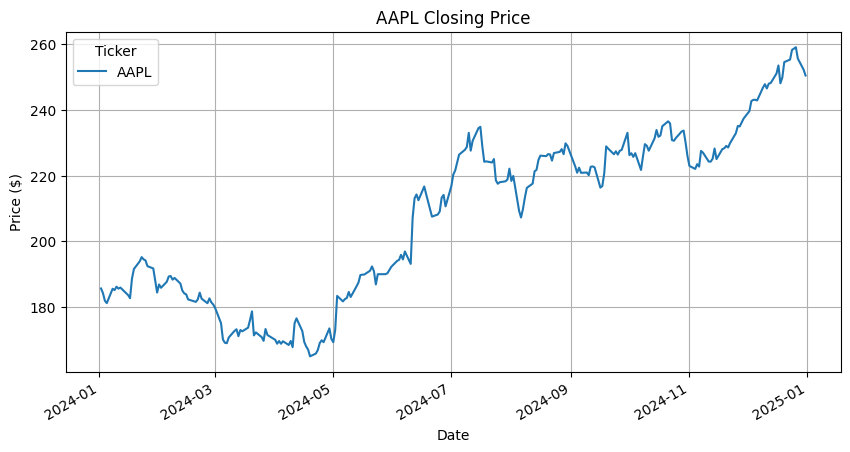

In [4]:
data['Close'].plot(figsize=(10, 5), title='AAPL Closing Price', ylabel='Price ($)')
plt.grid()
plt.show()

📈 A visual of how `AAPL` performed throughout the year!


### **III. Calculate Moving Averages (SMA)**

Smooth out the noise with moving averages:

In [6]:
data['SMA20'] = data['Close'].rolling(window=20).mean()
data['SMA50'] = data['Close'].rolling(window=50).mean()

Now let's plot:

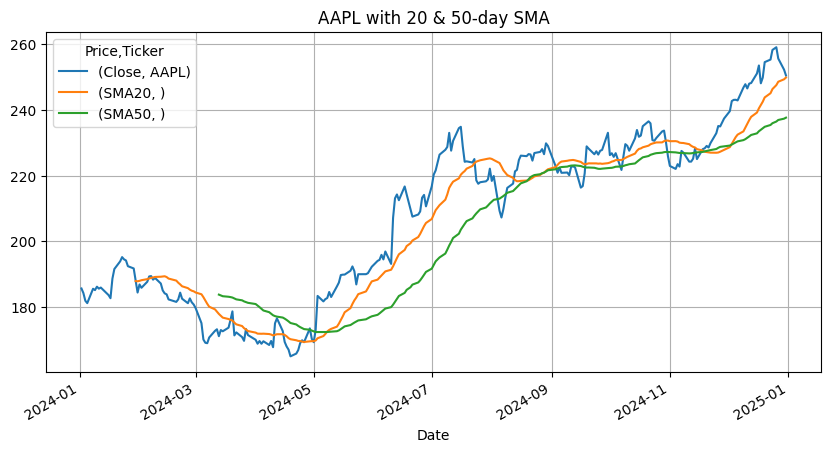

In [7]:
data[['Close', 'SMA20', 'SMA50']].plot(figsize=(10, 5), title='AAPL with 20 & 50-day SMA')
plt.grid()
plt.show()

### **IV. Visualize Daily Returns**

Measure volatility with percentage change:

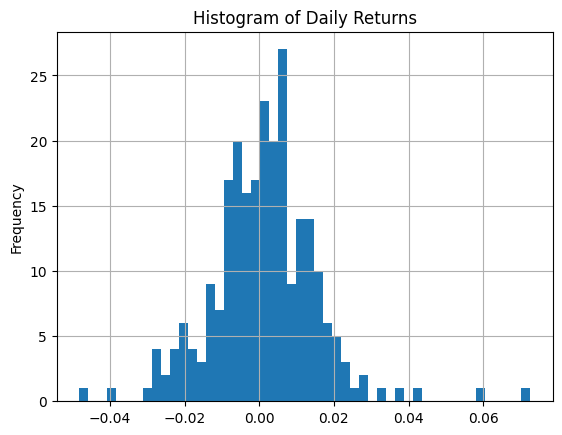

In [9]:
data['Daily Return'] = data['Close'].pct_change()

data['Daily Return'].plot(kind='hist', bins=50, title='Histogram of Daily Returns')
plt.grid()
plt.show()

🔁 Helps identify *risk and volatility*.

### **V. Plot Candlestick Chart (optional)**

More *advanced visualization*:

In [10]:
import plotly.graph_objects as go

In [13]:
fig = go.Figure(data=[go.Candlestick(
    x=data.index,
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Close'])])

fig.update_layout(title='AAPL Candlestick Chart')
fig.show()

> <i>"Looks pro-level, right? 🔥"</i>

**Me**: *Yeah :)*

### **VI. Analyze Stock Correlations**

Compare `AAPL` with `MSFT`:

In [15]:
tickers = ['AAPL', 'MSFT']
data = yf.download(tickers, start="2024-01-01", end="2025-01-01", auto_adjust=False)
correlation = data['Adj Close'].pct_change().corr()
print(correlation)

[*********************100%***********************]  2 of 2 completed

Ticker      AAPL      MSFT
Ticker                    
AAPL    1.000000  0.470471
MSFT    0.470471  1.000000


🧠 Know *which stocks move together*!

### **BONUS: Simple Buy/Sell Strategy**

Buy if `SMA20` > `SMA50` (bullish), sell otherwise:

In [23]:
data['SMA20'] = data['Close'].iloc[:, 0].rolling(window=20).mean()
data['SMA50'] = data['Close'].iloc[:, 0].rolling(window=50).mean()

data['Signal'] = 0
data.iloc[20:, data.columns.get_loc('Signal')] = np.where(
    data['SMA20'].iloc[20:] > data['SMA50'].iloc[20:], 1, 0)
data['Position'] = data['Signal'].diff()

print(data[['SMA20', 'SMA50', 'Position']].tail())


Price            SMA20       SMA50 Position
Ticker                                     
Date                                       
2024-12-24  246.293500  235.914000      0.0
2024-12-26  247.491499  236.417399      0.0
2024-12-27  248.524500  236.893599      0.0
2024-12-30  249.267999  237.294599      0.0
2024-12-31  249.809499  237.602999      0.0
